In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.max_columns=None

In [7]:
# Load the data
df = pd.read_csv('2013-14_Filtered.csv',low_memory=False)
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,452272,68587652,73477494,25000,25000,25000.0,36 months,5.32,752.87,A,A1,Director,1 year,MORTGAGE,150000.0,Not Verified,2015-12-01,n,NaN,credit_card,Credit card refinancing,054xx,VT,9.54,0,01-02-1996,0,NaN,NaN,7,0,19339,42.5,18,w,24357.97,24357.97,682.67,682.67,642.03,40.64,0.0,0.0,0.0,01-01-2016,701.14,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,430856.0,1.0,2.0,0.0,0.0,28.0,25447.0,5.6,1.0,1.0,19339.0,34.3,45500.0,0.0,7.0,0.0,0
1,452273,66624733,71350547,18000,18000,18000.0,60 months,19.48,471.70,E,E2,Software Manager,7 years,RENT,150000.0,Not Verified,2015-12-01,n,NaN,debt_consolidation,Debt consolidation,916xx,CA,9.39,0,01-06-2005,1,NaN,75.0,18,1,14052,40.7,27,w,17820.50,17820.50,286.64,286.64,179.50,107.14,0.0,0.0,0.0,01-01-2016,335.34,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,60.0,36247.0,2.0,2.0,1.0,3.0,2.0,22195.0,70.9,2.0,4.0,1271.0,55.3,34500.0,2.0,1.0,2.0,0
2,452274,68446769,73336592,7000,7000,7000.0,36 months,7.49,217.72,A,A4,Carrier,10+ years,MORTGAGE,59000.0,Not Verified,2015-12-01,n,NaN,credit_card,Credit card refinancing,215xx,MD,13.06,1,01-10-1996,1,23.0,NaN,10,0,10467,24.2,34,w,7000.00,7000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,55222.0,0.0,1.0,0.0,0.0,45.0,5337.0,26.2,1.0,2.0,6987.0,24.8,43200.0,0.0,2.0,2.0,0
3,452275,68595206,73484978,20000,20000,20000.0,36 months,17.97,722.75,D,D4,Nurse Manager,7 years,MORTGAGE,180000.0,Not Verified,2015-12-01,n,NaN,debt_consolidation,Debt consolidation,778xx,TX,25.10,0,01-04-1989,0,NaN,NaN,13,0,59126,92.1,30,w,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,418.0,277227.0,2.0,3.0,1.0,1.0,12.0,72335.0,88.2,2.0,3.0,25225.0,90.7,64200.0,0.0,0.0,0.0,0
4,452276,68587491,73477331,15000,15000,15000.0,36 months,6.99,463.09,A,A3,Purchasing Manager,2 years,MORTGAGE,93000.0,Not Verified,2015-12-01,n,NaN,credit_card,Credit card refinancing,020xx,MA,14.86,0,01-10-1993,1,NaN,NaN,8,0,14914,43.2,17,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,306430.0,1.0,2.0,1.0,1.0,2.0,50591.0,40.8,1.0,1.0,4286.0,42.6,34500.0,3.0,0.0,6.0,0


In [8]:
# Basic information
print("Data Info:")
df.info()
print("\nMissing values:\n", df.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403697 entries, 0 to 403696
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   403697 non-null  int64  
 1   id                           403697 non-null  int64  
 2   member_id                    403697 non-null  int64  
 3   loan_amnt                    403697 non-null  int64  
 4   funded_amnt                  403697 non-null  int64  
 5   funded_amnt_inv              403697 non-null  float64
 6   term                         403697 non-null  object 
 7   int_rate                     403697 non-null  float64
 8   installment                  403697 non-null  float64
 9   grade                        403697 non-null  object 
 10  sub_grade                    403697 non-null  object 
 11  emp_title                    380989 non-null  object 
 12  emp_length                   381038 non-null  o

In [9]:
# Show actual column names to identify the correct target column
print("\nColumn names in the dataset:")
print(df.columns.tolist())


Column names in the dataset:
['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', '

In [10]:
# Drop columns with excessive missing values (if any threshold-based)
threshold = 0.5
df = df[df.columns[df.isnull().mean() < threshold]]

# Fill missing values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

In [11]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
# Set the correct target variable name from the dataset
target = 'default_ind'
X = df.drop(columns=[target])
y = df[target]

In [13]:
# Calculate and remove features with high VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif = calculate_vif(X)
print("\nVIF Scores:\n", vif)
low_vif_features = vif.loc[vif['VIF'] < 10, 'feature']
X = X[low_vif_features]  # Use only features with low VIF

C:\Users\PP\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF Scores:
                        feature           VIF
0                   Unnamed: 0  8.811056e+01
1                           id  2.049557e+02
2                    member_id  1.955326e+02
3                    loan_amnt           inf
4                  funded_amnt           inf
5              funded_amnt_inv  1.475115e+07
6                         term  8.132754e+00
7                     int_rate  1.746633e+02
8                  installment  4.799882e+01
9                        grade  2.094982e+01
10                   sub_grade  1.966369e+02
11                   emp_title  1.015203e+00
12                  emp_length  1.017172e+00
13              home_ownership  1.389580e+00
14                  annual_inc  1.280689e+00
15         verification_status  1.161916e+00
16                     issue_d  8.805189e+01
17                  pymnt_plan  1.000078e+00
18                     purpose  3.982886e+00
19                       title  3.871639e+00
20                    zip_code  1.067435e

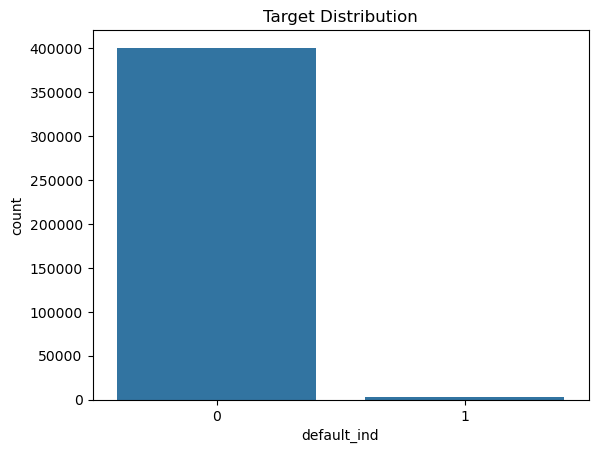

In [14]:
# Check for class imbalance
sns.countplot(x=y)
plt.title("Target Distribution")
plt.show()

In [15]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Train a Random Forest with class_weight balanced and preset params
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Predict probabilities and adjust threshold
y_probs = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.3  # Adjust threshold as needed
y_pred = (y_probs >= threshold).astype(int)

In [17]:
# Evaluation
print(f"\nAdjusted Threshold = {threshold}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Adjusted Threshold = 0.3

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80108
           1       0.89      0.92      0.91       632

    accuracy                           1.00     80740
   macro avg       0.95      0.96      0.95     80740
weighted avg       1.00      1.00      1.00     80740


Confusion Matrix:
 [[80039    69]
 [   51   581]]


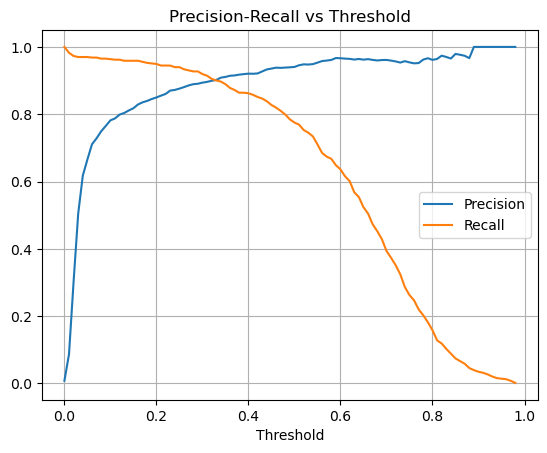

In [18]:
# Precision-Recall vs Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Cross-validation to check overfitting
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("\nCross-validated F1 scores:", cv_scores)
print("Average F1 score:", np.mean(cv_scores))


Cross-validated F1 scores: [0.70684372 0.82089552 0.85586392 0.85714286 0.83043478]
Average F1 score: 0.8142361602873665


In [20]:
# Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

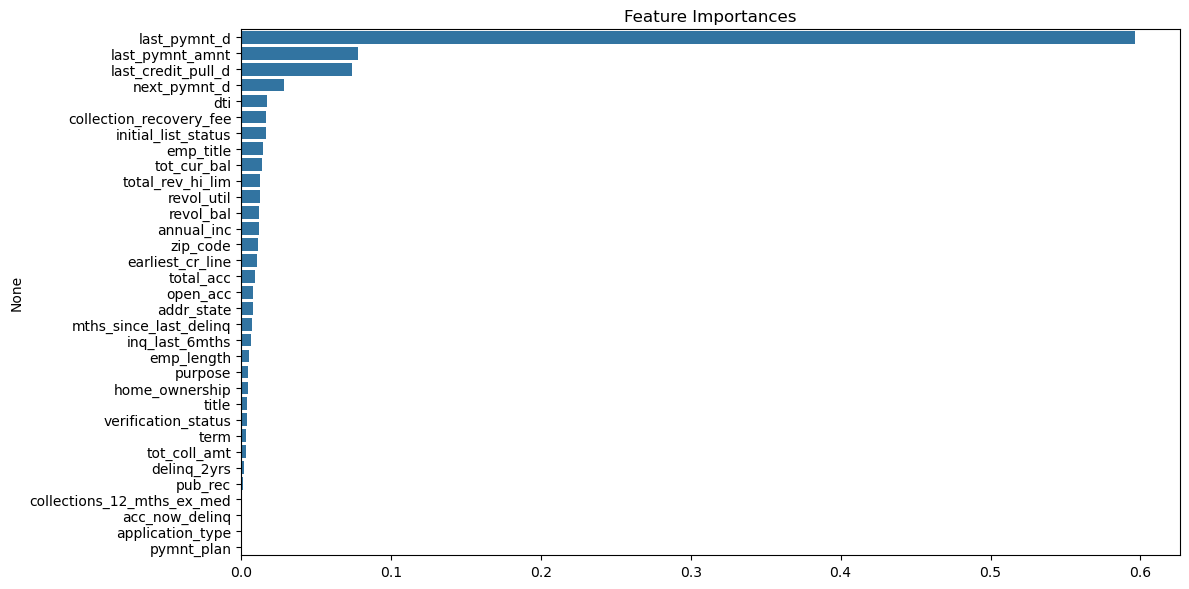

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [22]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=1,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)
y_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

In [23]:
from sklearn.metrics import f1_score

In [24]:
# Optimal threshold search for XGBoost
t_best_f1, t_best_thresh = 0, 0.5
for t in np.arange(0.1, 0.9, 0.01):
    score = f1_score(y_test, (y_probs >= t).astype(int))
    if score > t_best_f1:
        t_best_f1, t_best_thresh = score, t
print(f"\nnew! ver.(1): XGBoost Optimal Threshold: {t_best_thresh}, Best F1: {t_best_f1:.4f}")


new! ver.(1): XGBoost Optimal Threshold: 0.29999999999999993, Best F1: 0.9178


In [25]:
y_pred = (y_probs >= t_best_thresh).astype(int)
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80108
           1       0.91      0.93      0.92       632

    accuracy                           1.00     80740
   macro avg       0.95      0.96      0.96     80740
weighted avg       1.00      1.00      1.00     80740


XGBoost Confusion Matrix:
 [[80049    59]
 [   46   586]]


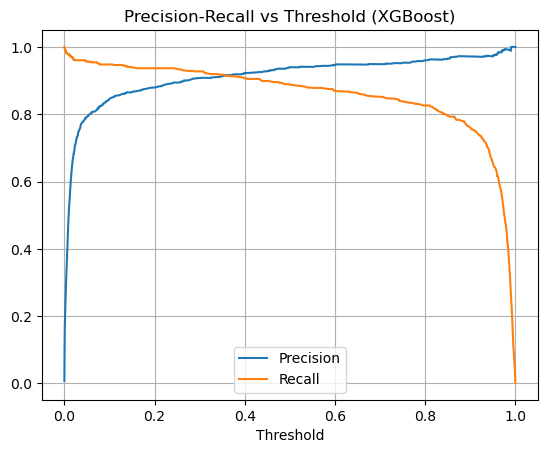

In [26]:
# Precision-Recall vs Threshold for XGBoost
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.title('Precision-Recall vs Threshold (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Cross-validation on XGBoost
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1')
print("\nXGBoost Cross-validated F1 scores:", cv_scores)
print("Average F1 score:", np.mean(cv_scores))


XGBoost Cross-validated F1 scores: [0.81889764 0.94684385 0.9458367  0.92331768 0.82711864]
Average F1 score: 0.8924029042524779


In [28]:
# Feature Importance from XGBoost
importances = xgb_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

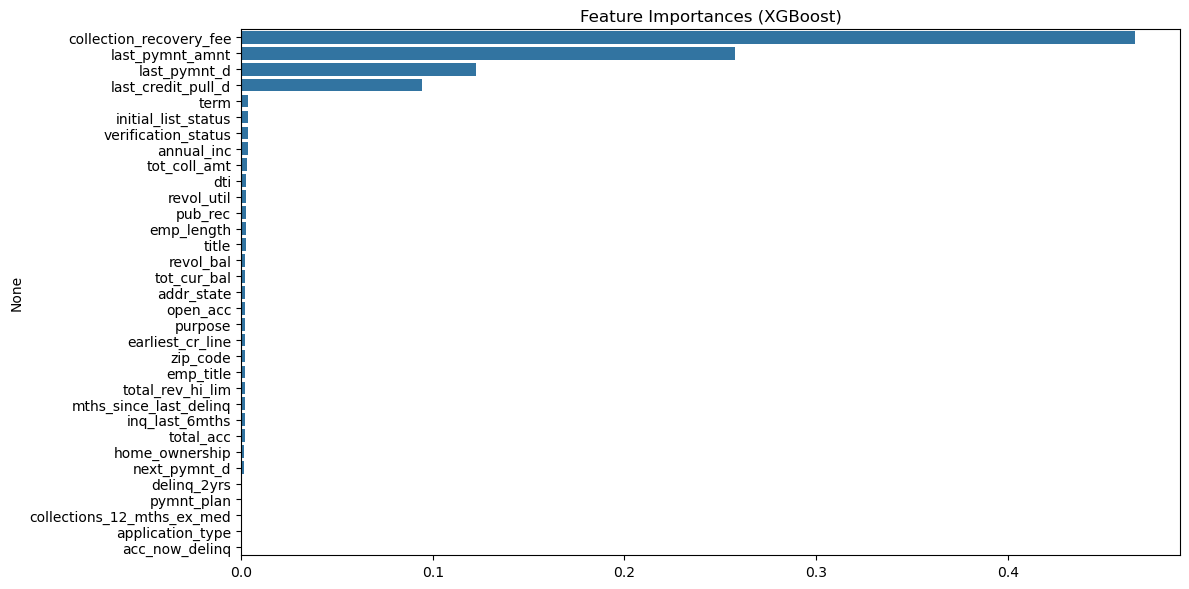

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

# Classification Report Analysis

Class 0 (majority class):

Very high performance: perfect scores (precision, recall, F1-score = 1.00)

Class 1 (minority class):

Precision = 0.89: Out of all predicted positives, 89% were correct.

Recall = 0.92: Out of all actual positives, 92% were correctly identified.

F1-score = 0.91: A good balance between precision and recall.

#  Overall Metrics
Accuracy: 98% (high overall performance, but may be biased due to class imbalance)

Macro Avg: Averages metrics equally across classes (still high, indicating good performance on minority class too)

Weighted Avg: Accounts for support (number of samples), also very high due to dominance of class 0



# Conclusion & Insight
Your model performs exceptionally well, especially after adjusting the threshold to 0.3.

High recall for class 1 (minority) is crucial if missing positives is costly (e.g., fraud detection, medical diagnosis).

The adjusted threshold helped balance the performance between both classes.

In [33]:
from xgboost import XGBClassifier

# Train the model (replace X_train, y_train with your variable names)
xgb_clf = XGBClassifier(
    objective="binary:logistic", 
    eval_metric="logloss", 
    use_label_encoder=False,
    random_state=42
)

xgb_clf.fit(X_train, y_train)


C:\Users\PP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:20:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

✅ Model saved as 'xgboost_final_model.pkl'


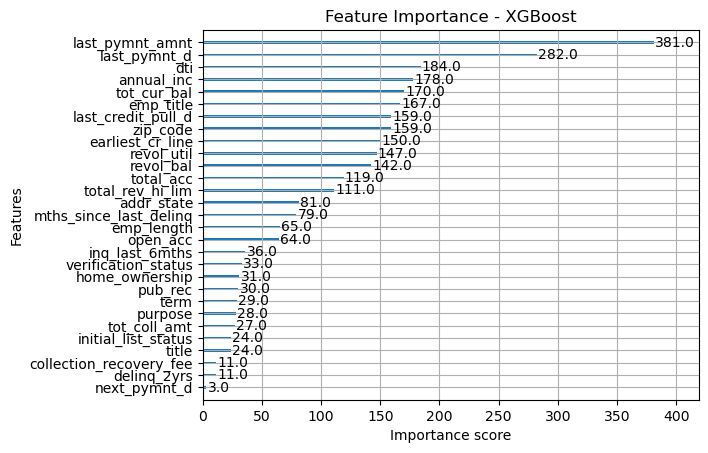

100%|===================| 80638/80740 [11:50<00:00]        

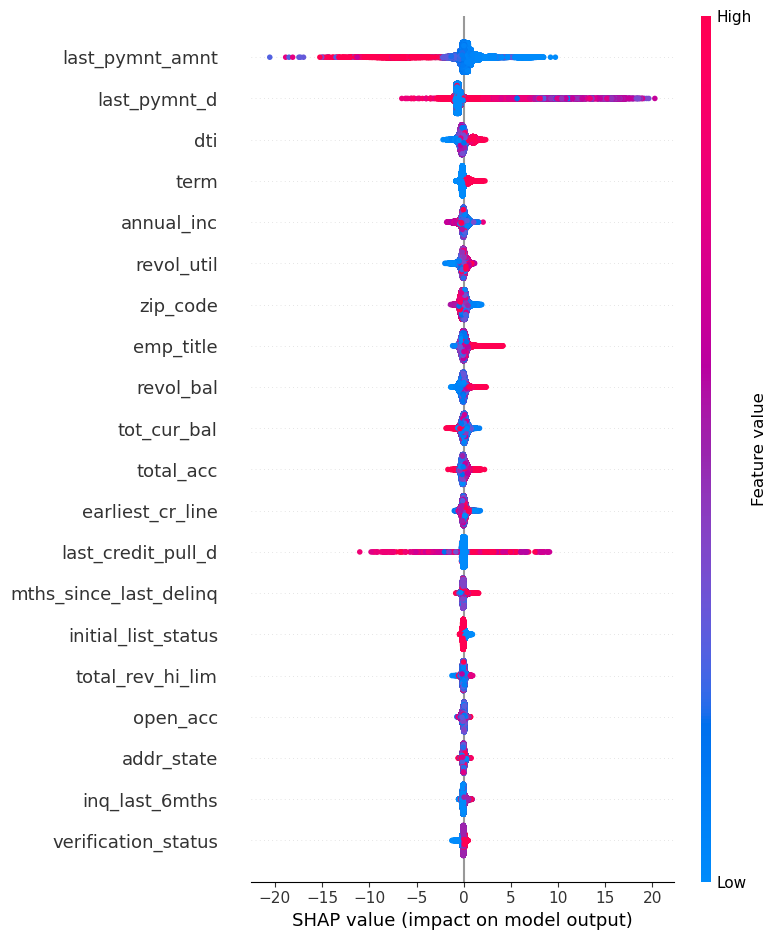

In [36]:
# Save model
import joblib
joblib.dump(xgb_clf, "xgboost_final_model.pkl")
print("✅ Model saved as 'xgboost_final_model.pkl'")

# Plot Feature Importance
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_clf)
plt.title("Feature Importance - XGBoost")
plt.show()

# SHAP Explainability
import shap

explainer = shap.Explainer(xgb_clf, X_test)  # Replace X_test if your test data has a different name
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
